In [12]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
import matplotlib.pylab as plt

In [2]:
'''
 Defining a function to build a dataset
 Splitting my dataset to test and train with test_size = 0.2 using use sklearn.model_selection.train_test_split
'''
def dataset_builder(n):
    x_list = []
    y_list = []
    for i in range(n):
        x = random.uniform(0, 2)
        x_list.append(x)
        L = random.uniform(-0.8, 0.8)
        y = -1 + (2/3) * np.sin(2 * x * np.pi) + L
        y_list.append(y)

    x_train, x_test, y_train, y_test = train_test_split(x_list, y_list, test_size = 0.2)
    return (x_train, x_test, y_train, y_test)

In [3]:
'''
 Creating dataset array
'''
x_train, x_test, y_train, y_test = dataset_builder(400)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
''' 
 Creating a MLP model using Keras
'''
model = Sequential()
model.add(Dense(100, input_shape=(1,)))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(1))

In [16]:
'''
Compiling with Adam optimizer and MSE loss function with 'accuracy' as metric
'''
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
history = model.fit(
    x_train, y_train,
    epochs=500,
    batch_size=32,
    shuffle=True,
    verbose=1)

Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.0000e+00
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.0000e+00
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.0000e+00
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.0000e+00
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.0000e+00
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.0000e+00
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss:

10/10 [==============================] - 0s 2ms/step


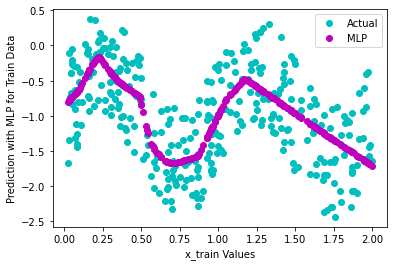

3/3 [==============================] - 0s 4ms/step


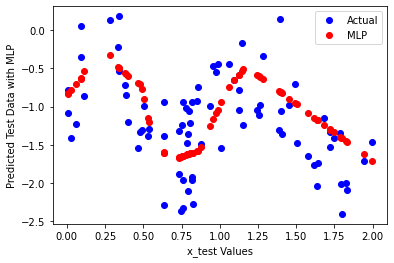

In [17]:
y_train_predict = model.predict(x_train)
plt.plot(x_train, y_train, 'co' , label='Actual')
plt.plot(x_train, y_train_predict, 'mo', label='MLP')
plt.ylabel('Prediction with MLP for Train Data')
plt.xlabel('x_train Values')
plt.legend()
plt.show()

y_test_predict = model.predict(x_test)
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, y_test_predict, 'ro', label='MLP')
plt.ylabel('Predicted Test Data with MLP')
plt.xlabel('x_test Values')
plt.legend()
plt.show()

In [18]:
class RBFN(object):

    def __init__(self, hidden_shape, sigma=1.0):
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    def _calculate_interpolation_matrix(self, X):
        ''' Calculates interpolation matrix using a kernel_function'''

        G = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                G[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return G

    def _select_centers_random(self, X):
        random_args = np.random.choice(len(X), self.hidden_shape)
        centers = X[random_args]
        return centers

    def fit(self, X, Y):
        ''' Fits weights using linear regression'''
        self.centers = self._select_centers_random(X)
        G = self._calculate_interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(G), Y)

    def predict(self, X):
        G = self._calculate_interpolation_matrix(X)
        predictions = np.dot(G, self.weights)
        return predictions

In [23]:
# K-Means
class Kmeans:
    def __init__(self, k, data, no_iter=100, optimized=True):
        self.k = k
        total_loss = []
        # Random initialization
        cluster_centers = np.random.random([k, data.shape[-1]])
        # Calculate Distance of each point to every cluster centers.
        dist_vec = np.zeros([k, data.shape[0]])
        cur = 0
        while(cur < no_iter):
            for idx, _center in enumerate(cluster_centers):
                dist_vec[idx] = np.sum(np.square(np.subtract(np.broadcast_to(_center, data.shape), data)), axis=1)
            # Determine Argmin center
            labels = np.argmin(dist_vec, axis=0)
            loss = 0
            for idx in range(k):
                # Check Cluster Balance
                if data[labels == idx].shape[0] < 2: # Degrees should be greater than 0
                    cluster_centers = np.random.random([k, data.shape[-1]])
                    cur = -1
                    break
                # Calculate Loss J
                loss += np.sum(dist_vec[idx][labels == idx])
                # Update cluster centers
                cluster_centers[idx] = np.average(data[labels == idx], axis=0)
            if cur >= 0:
                total_loss.append(loss)
            if optimized and cur > 1 and (total_loss[-1] == total_loss[-2]):
                break
            cur += 1
        self.centers, self.labels, self.total_loss = cluster_centers, labels, total_loss

In [ ]:
# GMM
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(x_train)
labels = gmm.predict(x_train)

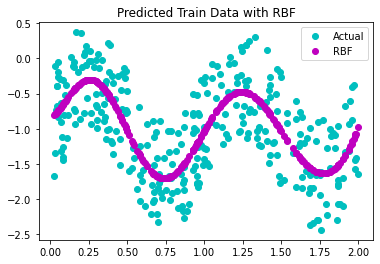

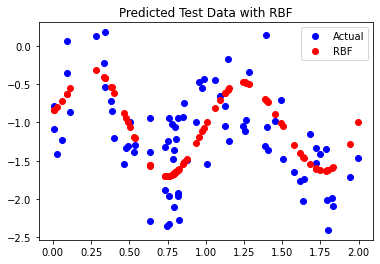

In [19]:
model = RBFN(hidden_shape=10, sigma=1.)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

plt.plot(x_train, y_train, 'co', label='Actual')
plt.plot(x_train, y_pred, 'mo', label='RBF')
plt.legend(loc='upper right')
plt.title('Predicted Train Data with RBF')
plt.show()

plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, y_test_pred, 'ro', label='RBF')
plt.legend(loc='upper right')
plt.title('Predicted Test Data with RBF')
plt.show()